# 2D Advection-Diffusion equation

in this notebook we provide a simple example of the DeepMoD algorithm and apply it on the 2D advection-diffusion equation. 

In [1]:
# General imports
import numpy as np
import torch
import matplotlib.pylab as plt

# DeepMoD functions

from deepymod import DeepMoD
from deepymod.model.func_approx import NN, Siren
from deepymod.model.library import Library2D_third
from deepymod.model.constraint import LeastSquares
from deepymod.model.sparse_estimators import Threshold,PDEFIND
from deepymod.training import train
from deepymod.training.sparsity_scheduler import TrainTestPeriodic
from scipy.io import loadmat
from deepymod.analysis import load_tensorboard

# Settings for reproducibility
np.random.seed(40)
torch.manual_seed(0)


%load_ext autoreload
%autoreload 2

## Spatial and temporal for experimental data

In [2]:
mask = np.array([False,True,False,True,True,False,False,False,False])

In [3]:
ref = np.array([0,0.2,0,0.02,0.02,0,0,0,0]) 

In [ ]:
data_loop = [3,4,5,7,9,13,25]
error_40 = []
for idx in data_loop:
    df = load_tensorboard('final_runs/x40_50/'+str(idx)+'/')
    xi = np.abs(np.array([df.loc[:,'unscaled_coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,9)]))[:,-1]
    if np.ma.allequal(xi.astype(bool), mask) == True:
        print('correct')
        error_40.append(1) 
    else: 
        error_40.append(0) 
        print('wrong')

correct
correct
correct
correct
correct


In [ ]:
data_loop = [3,4,5,7,9,13,25]
error_20 = []
for idx in data_loop:
    df = load_tensorboard('final_runs/x20_25/'+str(idx)+'/')
    xi = np.abs(np.array([df.loc[:,'unscaled_coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,9)]))[:,-1]
    if np.ma.allequal(xi.astype(bool), mask) == True:
        print('correct')
        error_20.append(1) 
    else: 
        error_20.append(0) 
        print('wrong')

In [ ]:
data_loop = [3,4,5,7,9,13,25]
error_15 = []
for idx in data_loop:
    df = load_tensorboard('final_runs/x15_19/'+str(idx)+'/')
    xi = np.abs(np.array([df.loc[:,'unscaled_coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,9)]))[:,-1]
    if np.ma.allequal(xi.astype(bool), mask) == True:
        print('correct')
        error_15.append(1) 
    else: 
        error_15.append(0) 
        print('wrong')

In [7]:
data_loop = [3,4,5,7,9,13,25]
error_10 = []
for idx in data_loop:
    df = load_tensorboard('final_runs/x10_13/'+str(idx)+'/')
    xi = np.abs(np.array([df.loc[:,'unscaled_coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,9)]))[:,-1]
    if np.ma.allequal(xi.astype(bool), mask) == True:
        print('correct')
        error_10.append(1) 
    else: 
        error_10.append(0) 
        print('wrong')

correct
wrong
wrong
wrong
correct
correct
correct


In [8]:
data_loop = [3,4, 5, 7, 9, 13,25]
error_8 = []
for idx in data_loop:
    df = load_tensorboard('final_runs/x8_10/'+str(idx)+'/')
    xi = np.abs(np.array([df.loc[:,'unscaled_coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,9)]))[:,-1]
    if np.ma.allequal(xi.astype(bool), mask) == True:
        print('correct')
        error_8.append(1) 
    else: 
        error_8.append(0) 
        print('wrong')

wrong
correct
correct
wrong
wrong
wrong
correct


In [9]:
data_loop = [3,4, 5, 7, 9, 13, 25]
error_6 = []
for idx in data_loop:
    df = load_tensorboard('final_runs/x6_8/'+str(idx)+'/')
    xi = np.abs(np.array([df.loc[:,'unscaled_coeffs_output_0_coeff_'+str(i)] for i in np.arange(0,9)]))[:,-1]
    if np.ma.allequal(xi.astype(bool), mask) == True:
        print('correct')
        error_6.append(1) 
    else: 
        error_6.append(0) 
        print('wrong')

wrong
wrong
wrong
wrong
correct
correct
wrong


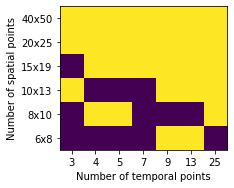

In [13]:
data_loop = [3,4,5,7,9,13,25]
plt.figure(figsize=(3,3))
plt.imshow(np.array([error_40, error_20,error_15,error_10, error_8,error_6]),aspect=1)
plt.yticks([0,1,2,3,4,5],['40x50','20x25', '15x19', '10x13','8x10','6x8'])
plt.xticks([0,1,2,3,4,5,6],data_loop)
plt.xlabel('Number of temporal points')
plt.ylabel('Number of spatial points')
plt.savefig('exp_results.pdf')
plt.show()

In [22]:
data_pre = np.load('diffusion_advection_29longb.npy').T
data= data_pre[120:-60,:,5:30]
down_data= np.take(np.take(np.take(data,np.arange(0,data.shape[0],12),axis=0),np.arange(0,data.shape[1],12),axis=1),np.arange(0,data.shape[2],3),axis=2)

steps = down_data.shape[2]
width = down_data.shape[0]
width_2 = down_data.shape[1]

x_arr = np.arange(0,width)
y_arr = np.arange(0,width_2)
t_arr = np.arange(0,steps)
x_grid, y_grid, t_grid = np.meshgrid(x_arr, y_arr, t_arr, indexing='ij')

In [15]:
X = np.transpose((t_grid.flatten()/np.max(t_grid), x_grid.flatten()/np.max(y_grid), y_grid.flatten()/np.max(y_grid)))
y = np.float32(down_data.reshape((down_data.size, 1)))
y = y/np.max(y)
y.shape

(1170, 1)

In [23]:
np.max(down_data)

148.0

In [25]:
np.var(y)

0.027318273

In [27]:
10**(-)/np.var(y)

0.3660553540592754

In [8]:
number_of_samples = 5000

idx = np.random.permutation(y.shape[0])
X_train = torch.tensor(X[idx, :][:number_of_samples], dtype=torch.float32, requires_grad=True)
y_train = torch.tensor(y[idx, :][:number_of_samples], dtype=torch.float32)

In [9]:
network = NN(3, [40, 40, 40, 40], 1)
library = Library2D_third(poly_order=0) 
estimator = Threshold(0.025) 
sparsity_scheduler = TrainTestPeriodic(periodicity=50, patience=200, delta=1e-5) 
constraint = LeastSquares() 

Now we instantiate the model and select the optimizer 

In [11]:
model = DeepMoD(network, library, estimator, constraint)
model.load_state_dict(torch.load('final_runs/x10_13/9/model.pt'))
model.eval()

DeepMoD(
  (func_approx): NN(
    (network): Sequential(
      (0): Linear(in_features=3, out_features=40, bias=True)
      (1): Tanh()
      (2): Linear(in_features=40, out_features=40, bias=True)
      (3): Tanh()
      (4): Linear(in_features=40, out_features=40, bias=True)
      (5): Tanh()
      (6): Linear(in_features=40, out_features=40, bias=True)
      (7): Tanh()
      (8): Linear(in_features=40, out_features=1, bias=True)
    )
  )
  (library): Library2D_third()
  (sparse_estimator): Threshold()
  (constraint): LeastSquares()
)

## Run DeepMoD 

We can now run DeepMoD using all the options we have set and the training data:
* The directory where the tensorboard file is written (log_dir)
* The ratio of train/test set used (split)
* The maximum number of iterations performed (max_iterations)
* The absolute change in L1 norm considered converged (delta)
* The amount of epochs over which the absolute change in L1 norm is calculated (patience)

Sparsity masks provide the active and non-active terms in the PDE:

In [12]:
sol = model(torch.tensor(X, dtype=torch.float32))[0].reshape((width,width_2,steps)).detach().numpy()

In [13]:
ux = model(torch.tensor(X, dtype=torch.float32))[2][0][:,1].reshape((width,width_2,steps)).detach().numpy()
uy = model(torch.tensor(X, dtype=torch.float32))[2][0][:,2].reshape((width,width_2,steps)).detach().numpy()

In [14]:
ut = model(torch.tensor(X, dtype=torch.float32))[1][0].reshape((width,width_2,steps)).detach().numpy()

In [15]:
uxx = model(torch.tensor(X, dtype=torch.float32))[2][0][:,3].reshape((width,width_2,steps)).detach().numpy()
uyy = model(torch.tensor(X, dtype=torch.float32))[2][0][:,4].reshape((width,width_2,steps)).detach().numpy()

In [16]:
import pysindy as ps

In [17]:
fd_spline = ps.SINDyDerivative(kind='spline', s=1e-2)
fd_spectral = ps.SINDyDerivative(kind='spectral')
fd_sg = ps.SINDyDerivative(kind='savitzky_golay', left=0.5, right=0.5, order=3)
fd =  ps.SINDyDerivative(kind='finite_difference', k=1)

In [18]:
dim_w = 3
denoised_sol = []
for i in np.arange(steps):
    uwn,sigmawn,vwn= np.linalg.svd(down_data[:,:,i])
    vwn = vwn.T
    denoised_sol.append(uwn[:,0:dim_w].dot(np.diag(sigmawn[0:dim_w]).dot(vwn[:,0:dim_w].T)))
denoised_sol = np.array(denoised_sol).T

In [19]:
denoised_sol= np.transpose(denoised_sol,axes=(1,0,2))

In [20]:
denoised_sol.shape

(10, 13, 9)

In [30]:
np.max(t_grid)



8

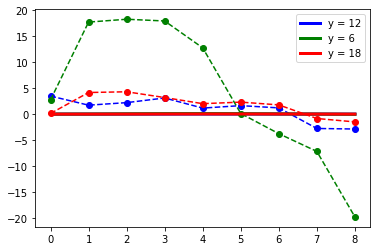

In [29]:
y = denoised_sol[5,3,:]
t = t_arr
plt.plot(t,fd_spline(y,t), 'bo--')
plt.plot(t,ut[5,3,:]/np.max(t_grid),'b', label='y = 12',linewidth=3)
y = denoised_sol[5,6,:]
t = t_arr
plt.plot(t,fd_spline(y,t), 'go--')
plt.plot(t,ut[5,6,:]/np.max(t_grid),'g', label='y = 6',linewidth=3)
y = denoised_sol[5,10,:]
t = t_arr
plt.plot(t,fd_spline(y,t), 'ro--')
plt.plot(t,ut[5,10,:]/np.max(t_grid),'r', label='y = 18',linewidth=3)
plt.legend()

/home/remy/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:513: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


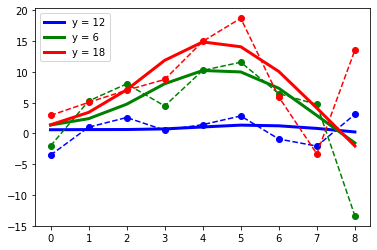

In [17]:
y = down_data[7,5,:]
t = t_arr
plt.plot(t,fd_spline(y,t), 'bo--')
plt.plot(t,ut[7,5,:]*np.max(down_data)/np.max(t_grid),'b', label='y = 12',linewidth=3)
y = down_data[7,10,:]
t = t_arr
plt.plot(t,fd_spline(y,t), 'go--')
plt.plot(t,ut[7,10,:]*np.max(down_data)/np.max(t_grid),'g', label='y = 6',linewidth=3)
y = down_data[7,15,:]
t = t_arr
plt.plot(t,fd_spline(y,t), 'ro--')
plt.plot(t,ut[7,15,:]*np.max(down_data)/np.max(t_grid),'r', label='y = 18',linewidth=3)
plt.legend()

In [25]:
np.max(down_data)

148.0

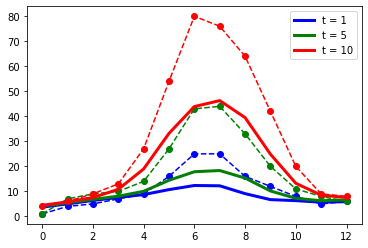

In [24]:
y = down_data[5,:,1]
x = y_arr
plt.plot(x,y, 'bo--')
plt.plot(x,sol[5,:,1]*np.max(down_data),'b', label='t = 1',linewidth=3)
y = down_data[5,:,2]
x = y_arr
plt.plot(x,y, 'go--')
plt.plot(x,sol[5,:,2]*np.max(down_data),'g', label='t = 5',linewidth=3)
y = down_data[5,:,4]
x = y_arr
plt.plot(x,y, 'ro--')
plt.plot(x,sol[5,:,4]*np.max(down_data),'r', label='t = 10',linewidth=3)
plt.legend()

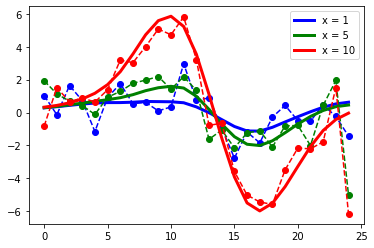

In [19]:
y = denoised_sol[7,:,1]
x = y_arr
plt.plot(x,fd_spline(y,x), 'bo--')
plt.plot(x,uy[7,:,1]*np.max(down_data)/np.max(y_grid),'b', label='x = 1',linewidth=3)
y = denoised_sol[7,:,2]
x = y_arr
plt.plot(x,fd_spline(y,x), 'go--')
plt.plot(x,uy[7,:,2]*np.max(down_data)/np.max(y_grid),'g', label='x = 5',linewidth=3)
y = denoised_sol[7,:,4]
x = y_arr
plt.plot(x,fd_spline(y,x), 'ro--')
plt.plot(x,uy[7,:,4]*np.max(down_data)/np.max(y_grid),'r', label='x = 10',linewidth=3)
plt.legend()

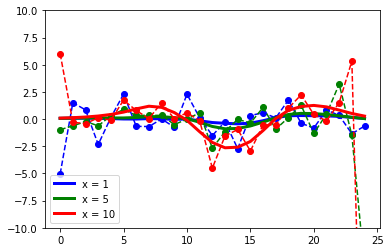

In [40]:
y = denoised_sol[7,:,1]
x = y_arr
plt.plot(x,fd_spline(fd_spline(y,x)), 'bo--')
plt.plot(x,uyy[7,:,1]*np.max(down_data)/(np.max(y_grid)*np.max(y_grid)),'b',label='x = 1',linewidth=3)
y = denoised_sol[7,:,2]
x = y_arr
plt.plot(x,fd_spline(fd_spline(y,x)), 'go--')
plt.plot(x,uyy[7,:,2]*np.max(down_data)/(np.max(y_grid)*np.max(y_grid)),'g',label='x = 5',linewidth=3)
y = denoised_sol[7,:,4]
x = y_arr
plt.plot(x,fd_spline(fd_spline(y,x)), 'ro--')
plt.plot(x,uyy[7,:,4]*np.max(down_data)/(np.max(y_grid)*np.max(y_grid)),'r',label='x = 10',linewidth=3)
plt.ylim(-10,10)
plt.legend()

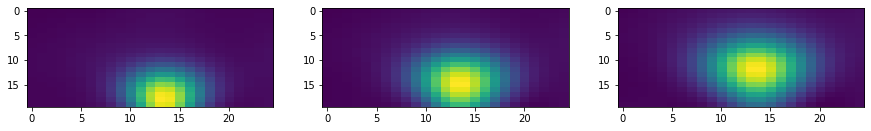

In [42]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3, 1)
plt.imshow(sol[:,:,1], aspect=0.5)

plt.subplot(1,3, 2)
plt.imshow(sol[:,:,3], aspect=0.5)

plt.subplot(1,3, 3)
plt.imshow(sol[:,:,5], aspect=0.5)


#plt.savefig('reconstruction.pdf')

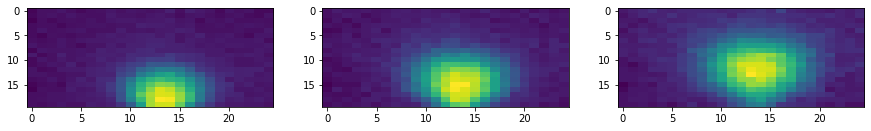

In [44]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3, 1)
plt.imshow(down_data[:,:,1], aspect=0.5)

plt.subplot(1,3, 2)
plt.imshow(down_data[:,:,3], aspect=0.5)

plt.subplot(1,3, 3)
plt.imshow(down_data[:,:,5], aspect=0.5)